Name : Soumya Raj Poddar
Email : soumyarajpoddar@gmail.com

# **Part A. Statistical Inferencing Tasks**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:\\fb_ad_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
data = data.sort_values("Clicks",ascending=True)
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
447,950531,936,123515,45-49,M,22,572,0,0.0,1,0
135,738098,936,109738,30-34,F,64,1539,0,0.0,1,0
316,778590,936,115876,30-34,M,30,1371,0,0.0,1,1
274,777201,936,115631,30-34,M,64,1882,0,0.0,1,1
446,950521,936,123514,30-34,M,21,351,0,0.0,1,0


In [ ]:
data[data["Clicks"] == 1].shape

(119, 11)

Probability of an ad having one click

In [ ]:
prob_1click = data[data["Clicks"] == 1].shape[0]/data.shape[0]
prob_1click 

0.10411198600174978

Probability of an ad showed to Male

In [ ]:
prob_m = data[data["gender"] == "M"].shape[0]/data.shape[0]
prob_m

0.5179352580927384

Probability of an ad showed to Female

In [ ]:
prob_f = data[data["gender"] == "F"].shape[0]/data.shape[0]
prob_f

0.4820647419072616

Probability of an ad having one-click given that it is shown to Male

In [ ]:
prob_1click_m = data[(data["gender"] == "M") & (data["Clicks"] == 1)].shape[0]/data[data["gender"] == "M"].shape[0]
prob_1click_m

0.10304054054054054

Probability of an ad having one click given that it is shown to Female

In [ ]:
prob_1click_f = data[(data["gender"] == "F") & (data["Clicks"] == 1)].shape[0]/data[data["gender"] == "F"].shape[0]
prob_1click_f

0.10526315789473684

Probability of an ad having one click and it is shown to Male

In [ ]:
prob_1click_f = data[(data["gender"] == "M") & (data["Clicks"] == 1)].shape[0]/data.shape[0]
prob_1click_f 

0.05336832895888014

Based on the computation of the above-mentioned probabilities, draw inference regarding the independence of events, if any. In particular, do you think that the event of “an ad having one click” is independent of the events that “the ad is shown to Male” or “the ad is shown to Female” ?

In [ ]:
print(prob_1click*prob_m, prob_1click_m)

0.053923268340363845 0.10304054054054054


Mean value of a click on an ad

In [ ]:
m_c = np.mean(data["Clicks"])
#m_c = np.mean(data[data["Clicks"] > 100]['Clicks'])
std_c = np.std(data["Clicks"])
#std_c = np.std(data[data["Clicks"] > 100]['Clicks'])
print(m_c,std_c)

33.39020122484689 56.86754552691034


 95% confidence intervals for the true value of a mean click

In [ ]:
from scipy.stats import t
c = data["Clicks"]
s_c = c.std()
dof = len(c) - 1
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m_c-s_c*t_crit/np.sqrt(len(c)), m_c+s_c*t_crit/np.sqrt(len(c)))

(30.088482659050797, 36.691919790642984)

 99% confidence intervals for the true value of a mean click

In [ ]:
confidence1 = 0.99
t_crit1 = np.abs(t.ppf((1-confidence1)/2,dof))
(m_c-s_c*t_crit1/np.sqrt(len(c)), m_c+s_c*t_crit1/np.sqrt(len(c)))

(29.048350165819027, 37.73205228387475)

Based on past experience, data scientist believes that the mean number of clicks on an ad is 31. She wants to formally test this hypothesis based on the given advertising data. What should be the null and alternative hypotheses? What statistical conclusion can she draw?

In [ ]:
#H0 : Mean = 31
#H1 : Mean != 31
#Null hypothesis is correct as the proposed mean value falls within the range of acceptance.

Fit an exponential pdf (Example wise - Main graph is plotted after a few cells)

<AxesSubplot:xlabel='Clicks', ylabel='Frequency'>

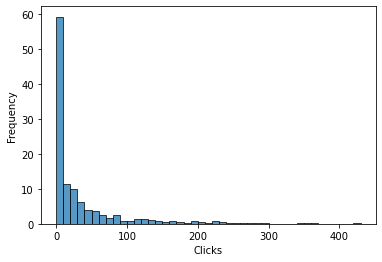

In [ ]:
import seaborn as sns
sns.histplot(data=data, x="Clicks",binwidth=10, stat='frequency')

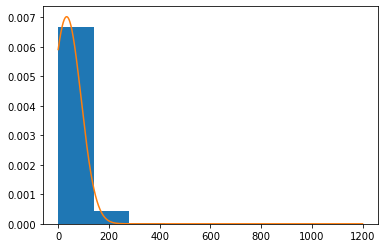

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
dist = norm(m_c,std_c)
values = [value for value in range(0, 1200)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(data['Clicks'], bins=3, density=True)
plt.plot(values, probabilities)
plt.show()

Compute the probability of a number of click exceeding 100 for an ad using clicks data

In [ ]:
prob_c_greaterthan100 = data[data["Clicks"] > 100].shape[0]/data.shape[0]
prob_c_greaterthan100

0.10498687664041995

Compute the probability of a number of click exceeding 100 for an ad using pdf fitted above

In [ ]:
from scipy import stats
pdf_c_greaterthan100 = stats.expon.sf(100, loc=0, scale =33)
pdf_c_greaterthan100

0.04830099924173013

Compute the probability of a number of click exceeding 400 for an ad using clicks data

In [ ]:
prob_c_greaterthan400 = data[data["Clicks"] > 400].shape[0]/data.shape[0]
prob_c_greaterthan400

0.0008748906386701663

Compute the probability of a number of click exceeding 400 for an ad pdf fitted above

In [ ]:
pdf_c_greaterthan400 = stats.expon.sf(400, loc=0,scale=33)
pdf_c_greaterthan400

5.442826138661205e-06

Difference between computed probabilities for clicks

In [ ]:
print("Difference between probability for ad clicks greater than 100 is :", prob_c_greaterthan100 - pdf_c_greaterthan100,'\n','Difference between probability for ad clicks greater than 400 is :', prob_c_greaterthan400 - pdf_c_greaterthan400)

Difference between probability for ad clicks greater than 100 is : 0.05668587739868981 
 Difference between probability for ad clicks greater than 400 is : 0.000869447812531505


Fit an exponential pdf

Fit parameters = [0.0, 33.39020122484689]'


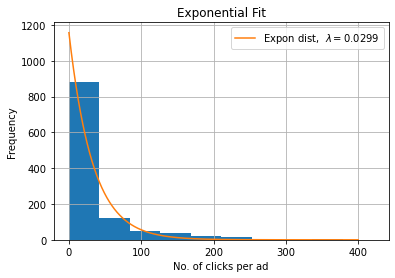

In [ ]:
s,l = stats.expon.fit(data['Clicks'])
print("Fit parameters = {}'".format([s,l]))
plt.figure(1)
domain = np.linspace(0,400,2000)
data['Clicks'].hist()
plt.plot(domain,data['Clicks'].sum()*stats.expon.pdf(x=domain,loc=0,scale=33),label = "Expon dist, "+f' $\lambda = {round(1/l,4)}$')
plt.title("Exponential Fit")
plt.xlabel("No. of clicks per ad")
plt.ylabel("Frequency")
plt.legend()

# **Part B: Exploratory Data Analysis**

In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
447,950531,936,123515,45-49,M,22,572,0,0.0,1,0
135,738098,936,109738,30-34,F,64,1539,0,0.0,1,0
316,778590,936,115876,30-34,M,30,1371,0,0.0,1,1
274,777201,936,115631,30-34,M,64,1882,0,0.0,1,1
446,950521,936,123514,30-34,M,21,351,0,0.0,1,0


In [ ]:
data['CPC'] = data['Spent']/(data['Total_Conversion']+data['Approved_Conversion'])
#data[data['CPC']== float('inf')]['CPC'] = 0
#data.describe()
#data['CPC'].unique()

In [ ]:
#data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
data.replace([np.inf, -np.inf], 0, inplace=True)
data.replace([np.nan, -np.nan], 0, inplace=True)
#data.replace(float('inf'), 0)
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,13.209229
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,22.233119
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.945625
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,6.185000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,16.919333
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,332.989999


In [ ]:
df = data
df = df.drop(['xyz_campaign_id','fb_campaign_id','Total_Conversion'], axis=1)
df.head()

,ad_id,age,gender,interest,Impressions,Clicks,Spent,Approved_Conversion,CPC
447,950531,45-49,M,22,572,0,0.0,0,0.0
135,738098,30-34,F,64,1539,0,0.0,0,0.0
316,778590,30-34,M,30,1371,0,0.0,1,0.0
274,777201,30-34,M,64,1882,0,0.0,1,0.0
446,950521,30-34,M,21,351,0,0.0,0,0.0


In [ ]:
data_corr = df.corr()['CPC'][:-1] # -1 because the latest row is CPC
golden_features_list = data_corr[abs(data_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with CPC:\n{}".format(len(golden_features_list), golden_features_list))

There is 9 strongly correlated values with CPC:
Clicks                 0.477857
Spent                  0.466117
Impressions            0.383181
xyz_campaign_id        0.373655
ad_id                  0.316384
fb_campaign_id         0.285713
Total_Conversion       0.028808
interest               0.021092
Approved_Conversion   -0.049339
Name: CPC, dtype: float64


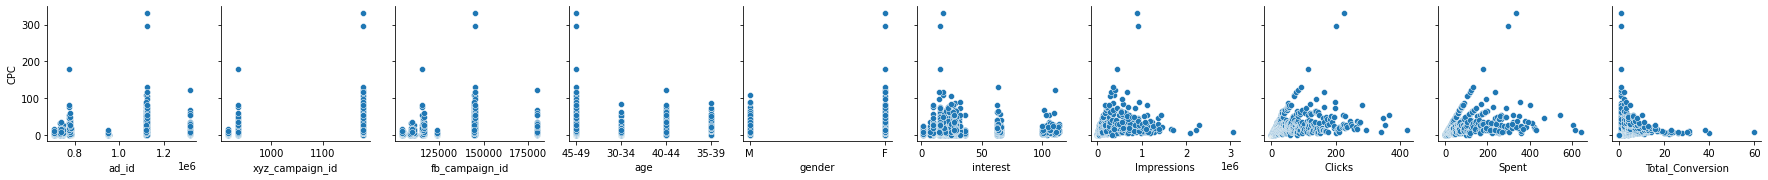

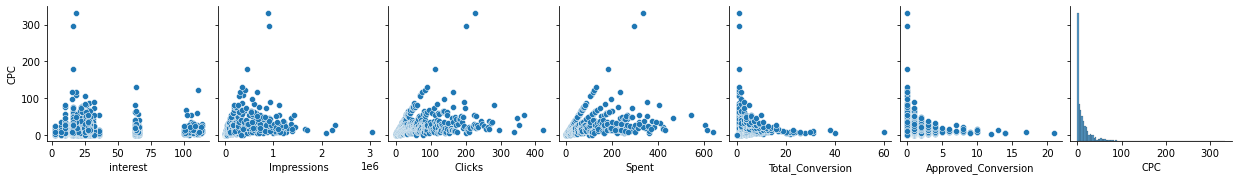

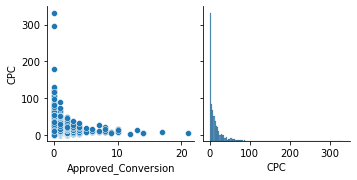

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+10],
                y_vars=['CPC'])

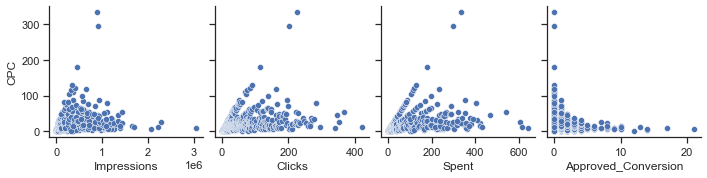

In [ ]:
import seaborn as sns
sns.pairplot(data=df,x_vars=['Impressions','Clicks','Spent','Approved_Conversion'],y_vars=['CPC'])

In [ ]:
df_gender = pd.pivot_table(df, index = ["gender"], values = ["Clicks","Spent","Approved_Conversion", "CPC"],aggfunc = {"Clicks":np.sum,"Spent":np.sum,"Approved_Conversion":np.sum,"CPC":np.mean})
df_gender

,Approved_Conversion,CPC,Clicks,Spent
gender,,,,
F,495,16.415719,23878,34502.619963
M,584,10.224809,14287,24202.609995


In [ ]:
df_age = pd.pivot_table(df, index = ["age"], values = ["Clicks","Spent","Approved_Conversion","CPC"],aggfunc = {"Clicks":np.sum,"Spent":np.sum,"Approved_Conversion":np.sum,"CPC":np.mean})
df_age

,Approved_Conversion,CPC,Clicks,Spent
age,,,,
30-34,494,6.136376,9483,15252.399986
35-39,207,11.002243,7094,11112.429994
40-44,170,16.453113,7736,11589.729981
45-49,208,24.325645,13852,20750.669997


In [ ]:
df_age_gender = pd.pivot_table(df, index = ["age","gender"], values = ["Clicks","Spent","Approved_Conversion","CPC"],aggfunc = {"Clicks":np.sum,"Spent":np.sum,"Approved_Conversion":np.sum,"CPC":np.mean})
df_age_gender

Approved_Conversion        CPC  Clicks         Spent
age   gender                                                      
30-34 F                       195   7.011501    5099   7611.479995
      M                       299   5.383540    4384   7640.919991
35-39 F                        95  13.014209    4161   6061.349992
      M                       112   9.424513    2933   5051.080003
40-44 F                        93  18.532462    5177   7396.579984
      M                        77  14.293013    2559   4193.149997
45-49 F                       112  30.886040    9441  13433.209993
      M                        96  16.843541    4411   7317.460004

In [ ]:
df_cpc = pd.pivot_table(df, index = ["age","gender"], values = ["Clicks","Spent","Approved_Conversion"],aggfunc = {np.sum})
df_cpc

Approved_Conversion Clicks         Spent
                             sum    sum           sum
age   gender                                         
30-34 F                      195   5099   7611.479995
      M                      299   4384   7640.919991
35-39 F                       95   4161   6061.349992
      M                      112   2933   5051.080003
40-44 F                       93   5177   7396.579984
      M                       77   2559   4193.149997
45-49 F                      112   9441  13433.209993
      M                       96   4411   7317.460004

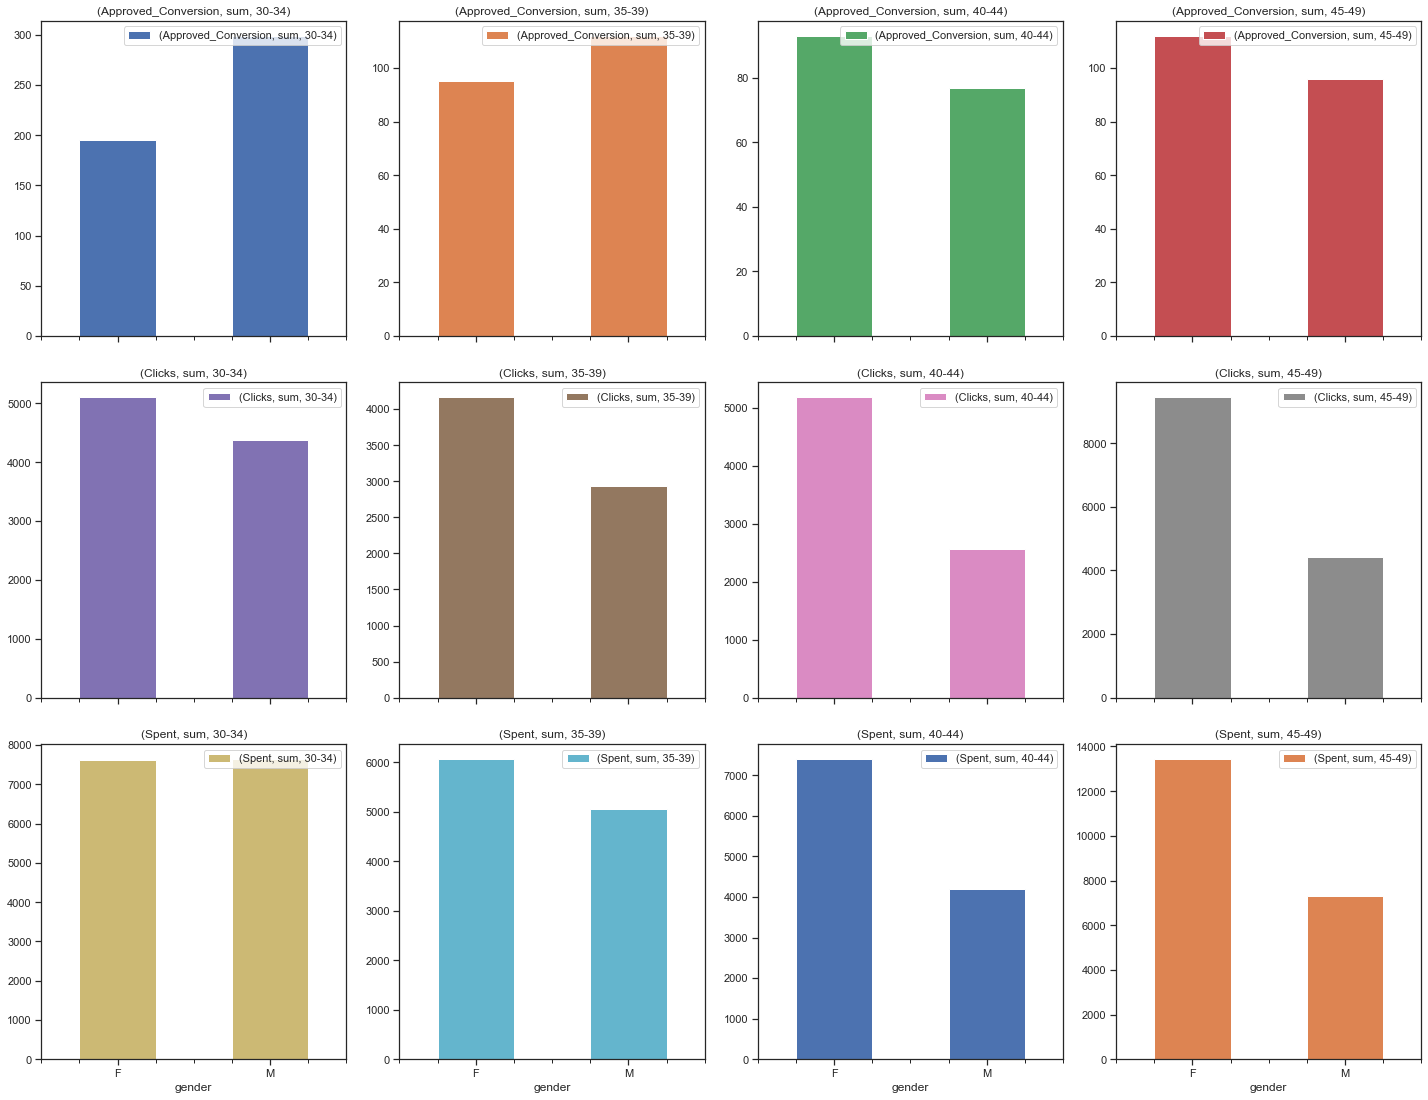

In [ ]:
import matplotlib.pyplot as plt
ax = df_cpc.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 20), layout=(4,4))
plt.tight_layout()

In [ ]:
data_ctr = pd.pivot_table(data, index = ["xyz_campaign_id"], values = ["Clicks","Spent","Total_Conversion", "Impressions"],aggfunc = {"Clicks":np.sum,"Spent":np.sum,"Approved_Conversion":np.sum,"Impressions":np.mean})
data_ctr

,Clicks,Impressions,Spent,Total_Conversion
xyz_campaign_id,,,,
916,113,8943.055556,149.710001,58
936,1984,17517.644397,2893.369999,537
1178,36068,327717.945600,55662.149959,2669


In [ ]:
data_ctr['CTR (in %)'] = (data_ctr['Clicks']/data_ctr['Impressions'])*100
data_ctr

,Clicks,Impressions,Spent,Total_Conversion,CTR (in %)
xyz_campaign_id,,,,,
916,113,8943.055556,149.710001,58,1.263550
936,1984,17517.644397,2893.369999,537,11.325724
1178,36068,327717.945600,55662.149959,2669,11.005806


In [ ]:
data_ctr['CPrC'] = (data_ctr['Spent']/data_ctr['Clicks'])
data_ctr

,Clicks,Impressions,Spent,Total_Conversion,CTR (in %),CPrC
xyz_campaign_id,,,,,,
916,113,8943.055556,149.710001,58,1.263550,1.324867
936,1984,17517.644397,2893.369999,537,11.325724,1.458352
1178,36068,327717.945600,55662.149959,2669,11.005806,1.543256


In [ ]:
df.groupby("interest")["Clicks"].sum()

interest
2       311
7       410
10     3317
15     1609
16     5144
18     1524
19     1188
20     1234
21      512
22      717
23      375
24      419
25     1066
26     1113
27     3409
28     2025
29     3315
30      389
31      195
32     1138
36      128
63     1675
64      989
65      372
66      138
100     395
101     524
102     150
103     333
104     265
105     453
106     332
107     639
108     402
109     572
110     365
111     260
112     339
113     233
114     191
Name: Clicks, dtype: int64

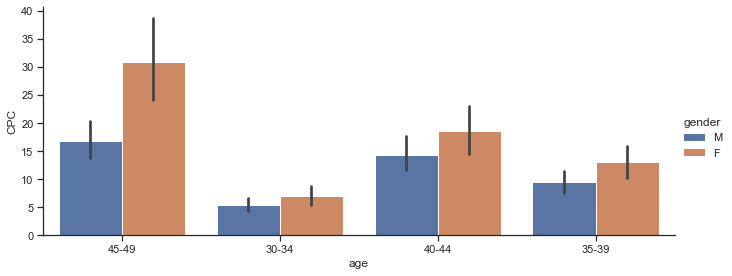

In [ ]:
sns.catplot(x="age",y="CPC",hue="gender",data=df,kind="bar",height=4,aspect=2.4)l
plt.show()

# Conclusion
As seen from the above data points and graphs, it can be inferred that the companies investing in aforementioned Ad-campaigns should target the 30-34 aged group and 40-44 aged Males' demographic to increase the Approved Conversion, for better sales records. This has been inferred as the number of clicks, approved conversion, and amount spent is comparatively less than the other demographics by far, while also showing considerable promise with the Clicks ratio and other similar KPIs.

As the 45-49 aged Females' demographic is showing promise in its ROI value, this demographic does not need to be actively targeted at the moment.